<a href="https://colab.research.google.com/github/gabrielmelendez779/deep_learning_cognitiveai/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

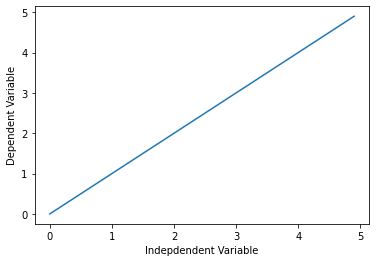

In [3]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [4]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-11-30 17:18:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   425KB/s    in 0.2s    

2020-11-30 17:18:12 (425 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [5]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [18]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

In [19]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [20]:
loss = tf.reduce_mean(tf.square(y - train_y))

In [21]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.05)



En la version 2.x la sentencia correcta es tf.keras.optimizer.SGD() 
para mas info revisar:

 https://www.kaggle.com/matthewmrpyton/gradient-descent-optimization-with-tensorflow-2 

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD



In [22]:
tf.compat.v1.disable_eager_execution()
train = optimizer.minimize(loss)

In [24]:
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

In [25]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 26992.592 20.0 30.2
5 1891.721 59.76378 46.635113
10 1762.7241 57.911816 51.973312
15 1653.5896 56.615788 57.051533
20 1559.0438 55.404785 61.776955
25 1477.137 54.277676 66.175224
30 1406.179 53.2286 70.26898
35 1344.7062 52.25216 74.079315
40 1291.4508 51.34332 77.62584
45 1245.3143 50.497402 80.926834
50 1205.3452 49.710052 83.999275
55 1170.719 48.97721 86.859
60 1140.7213 48.295113 89.52074
65 1114.734 47.660236 91.998184
70 1092.2202 47.069317 94.3041
75 1072.7162 46.51931 96.45037
80 1055.8192 46.00738 98.44805
85 1041.181 45.530895 100.30742
90 1028.4998 45.0874 102.038055
95 1017.5135 44.67461 103.64887


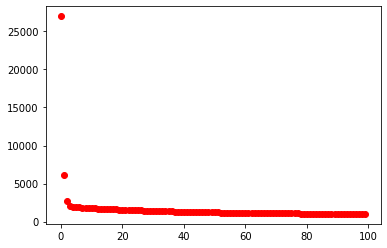

In [26]:
plt.plot(loss_values, 'ro')

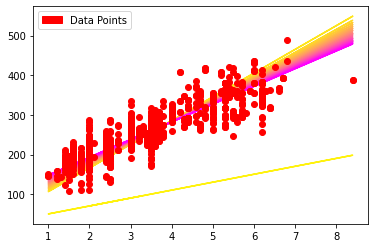

In [28]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')

green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()